# Инициализация проекта

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [137]:
df_red = pd.read_csv('../data/winequality-red.csv', sep=";")
df_white = pd.read_csv('../data/winequality-white.csv', sep=";")

df_red["type"] = "red"
df_white["type"] = "white"

data = pd.concat([df_red, df_white])

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Исследование исходных данных

<font size=4>
Датасет содержит следующие поля:

-   `fixed acidity` — фиксированная (титрируемая) кислотность
-    `volatile acidity` — летучая кислотность
-    `citric acid` — лимонная кислота
-    `residual sugar` — остаточный сахар
-    `chlorides` — хлориды
-    `free sulfur dioxide` — свободный диоксид серы
-    `total sulfur dioxide` — общий диоксид серы
-    `density` — плотность
-    `pH` — pH (водородный показатель)
-    `sulphates` — сульфаты
-    `alcohol` — спирт (алкоголь)
-    `quality` — качество
-    `type` — тип вина
</font>


In [138]:
data.info()

<class 'pandas.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   str    
dtypes: float64(11), int64(1), str(1)
memory usage: 710.6 KB


In [139]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


<font size=4><b>Получили следующую характеристику исходных данных:</b>

- столбцов с пропушенными столбцами нет
- тип вина представлен str
- все остальные атрибуты - float64
</font>

In [140]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Коррекция типов данных

In [141]:
float_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']
int_features = ['free sulfur dioxide', 'total sulfur dioxide', 'quality']

data[float_features] = data[float_features].astype("float32")
data[int_features] = data[int_features].astype("int32")

dict_type = {
    "red": 1,
    "white": 0}
data['type'] = data['type'].map(dict_type).astype("int32")

data.info()

<class 'pandas.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float32
 1   volatile acidity      6497 non-null   float32
 2   citric acid           6497 non-null   float32
 3   residual sugar        6497 non-null   float32
 4   chlorides             6497 non-null   float32
 5   free sulfur dioxide   6497 non-null   int32  
 6   total sulfur dioxide  6497 non-null   int32  
 7   density               6497 non-null   float32
 8   pH                    6497 non-null   float32
 9   sulphates             6497 non-null   float32
 10  alcohol               6497 non-null   float32
 11  quality               6497 non-null   int32  
 12  type                  6497 non-null   int32  
dtypes: float32(9), int32(4)
memory usage: 380.7 KB


# EDA

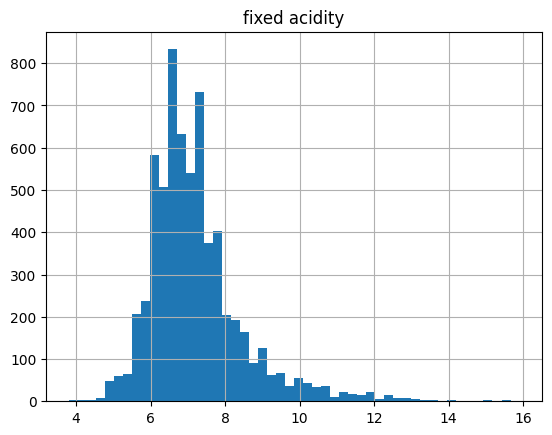

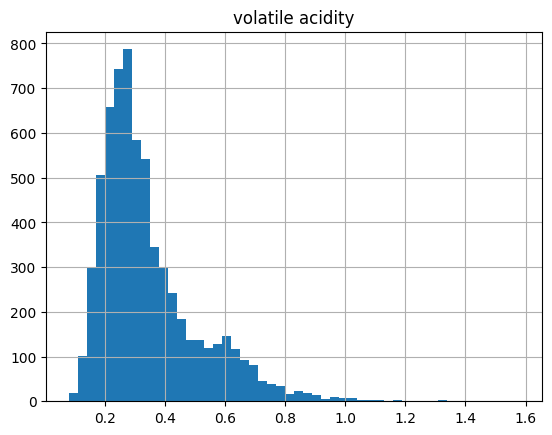

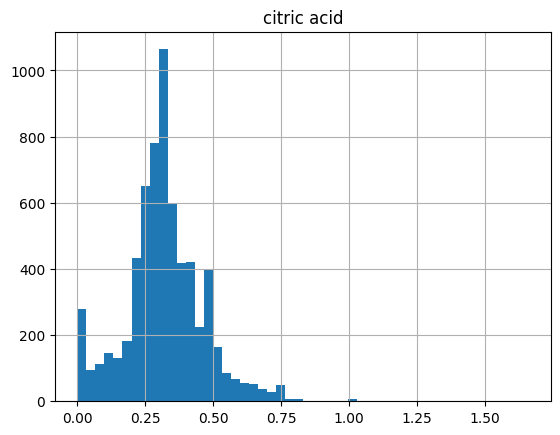

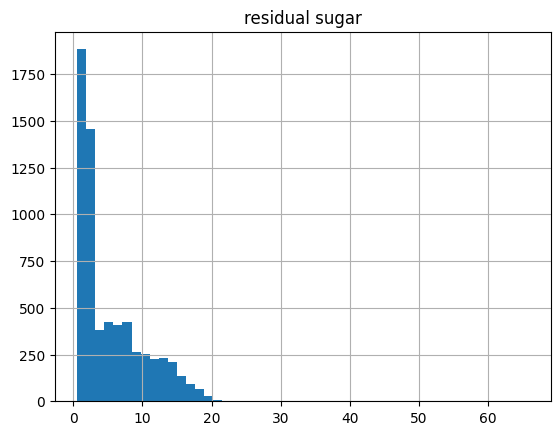

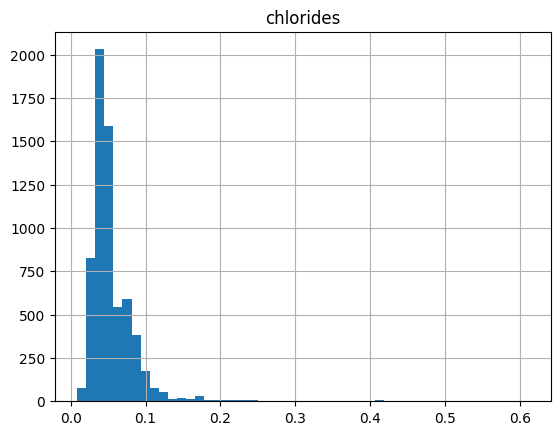

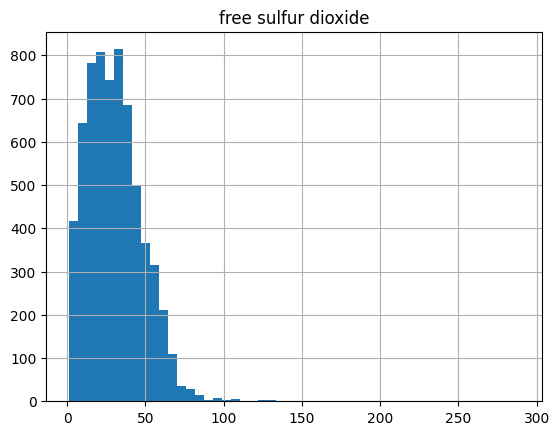

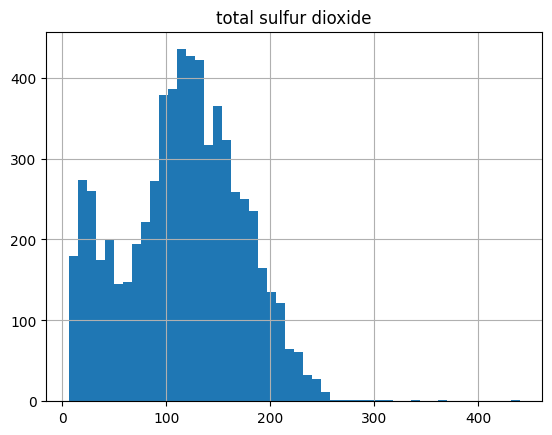

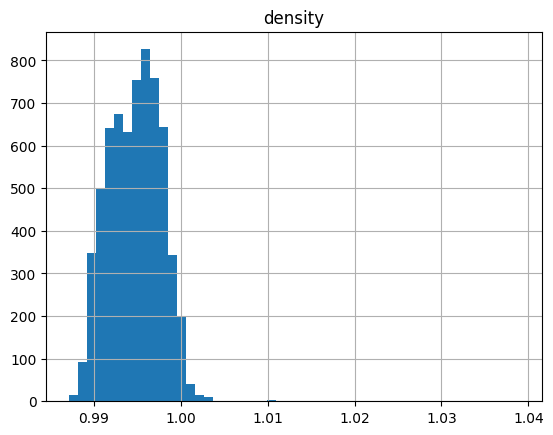

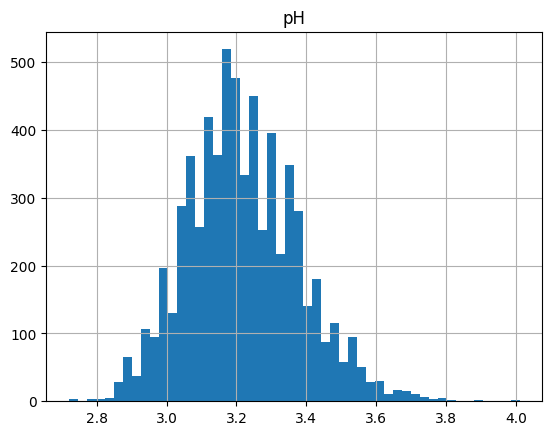

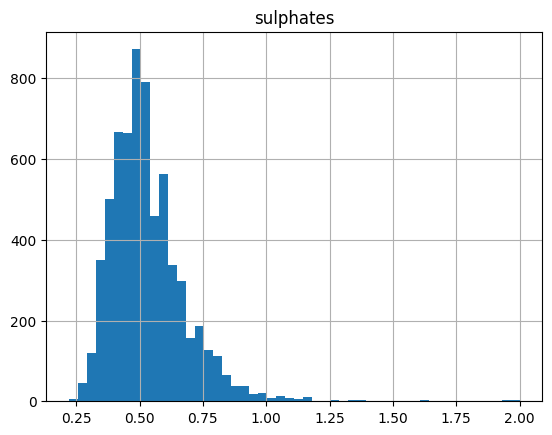

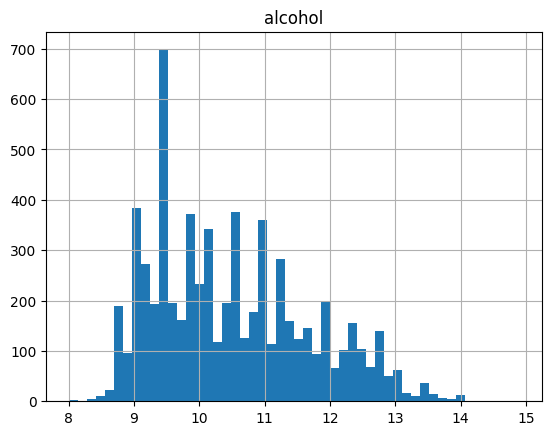

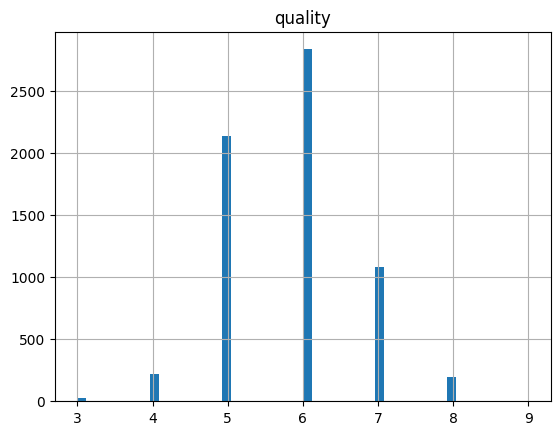

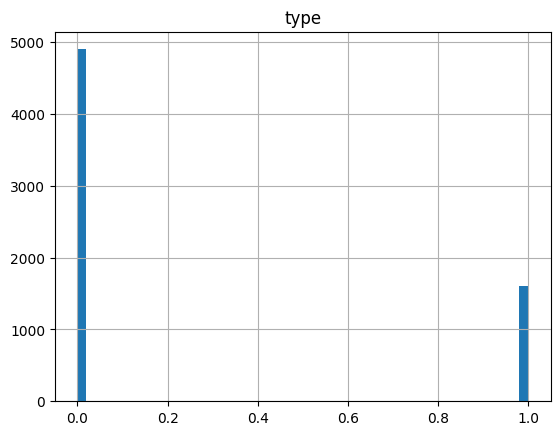

In [142]:
columns = data.columns

for column in columns:
    data.hist(column, bins=50)

## Изучение и обработка выбросов

In [143]:
outlier = data[columns]
outlier

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,0


In [144]:
# Определить нижние пределы для выбросов
Q1 = outlier.quantile(0.25)
Q1

fixed acidity            6.40000
volatile acidity         0.23000
citric acid              0.25000
residual sugar           1.80000
chlorides                0.03800
free sulfur dioxide     17.00000
total sulfur dioxide    77.00000
density                  0.99234
pH                       3.11000
sulphates                0.43000
alcohol                  9.50000
quality                  5.00000
type                     0.00000
Name: 0.25, dtype: float64

In [145]:
# Определить верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

fixed acidity             7.70000
volatile acidity          0.40000
citric acid               0.39000
residual sugar            8.10000
chlorides                 0.06500
free sulfur dioxide      41.00000
total sulfur dioxide    156.00000
density                   0.99699
pH                        3.32000
sulphates                 0.60000
alcohol                  11.30000
quality                   6.00000
type                      0.00000
Name: 0.75, dtype: float64

In [146]:
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1,6.3,0.30,0.34,1.6,0.049,14,132,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30,97,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47,186,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47,186,0.99560,3.19,0.40,9.9,6,0
5,8.1,0.28,0.40,6.9,0.050,30,97,0.99510,3.26,0.44,10.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,0


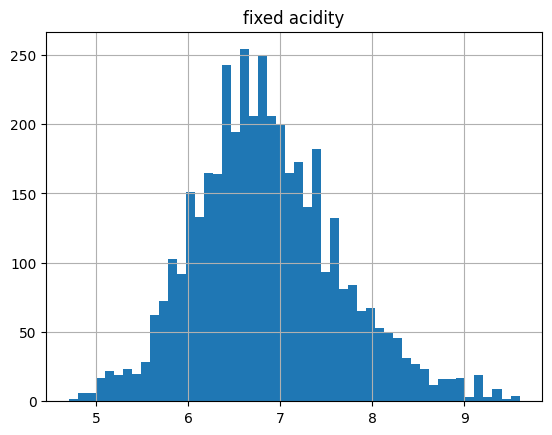

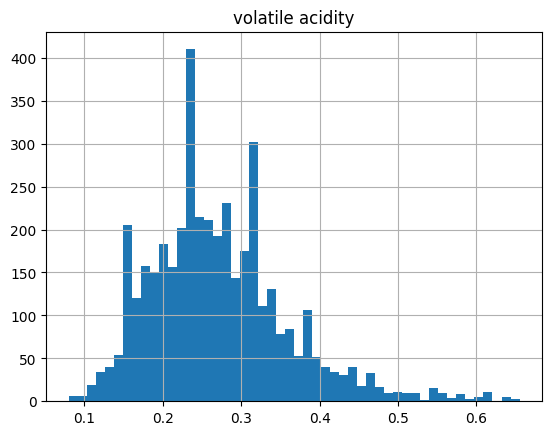

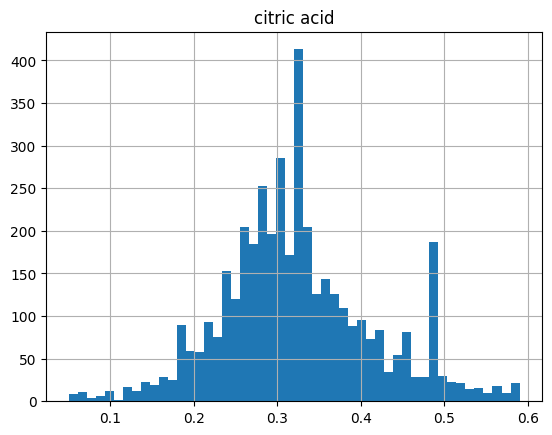

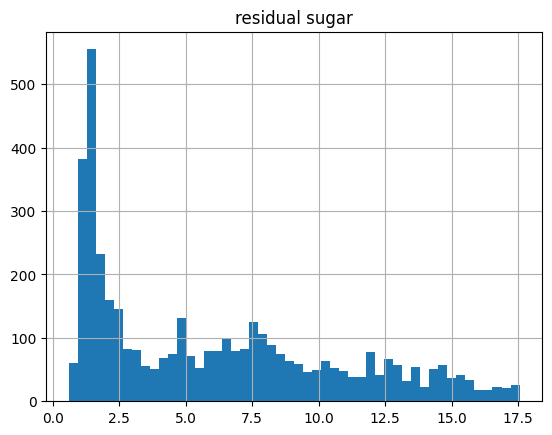

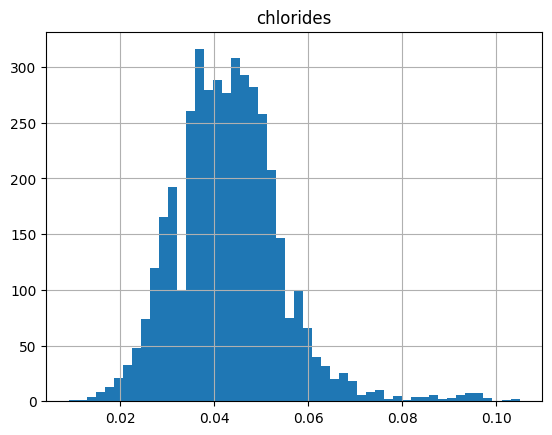

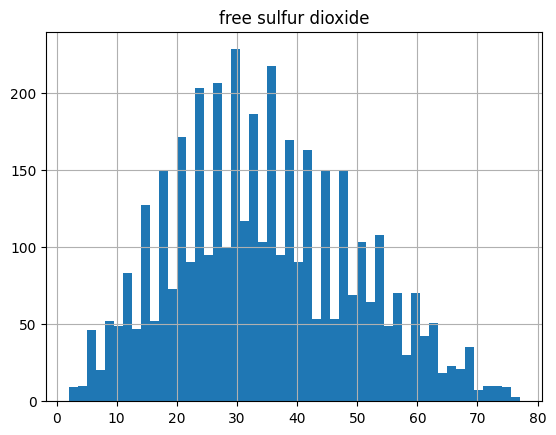

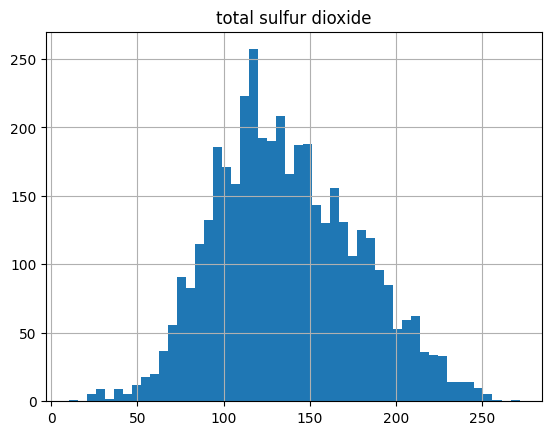

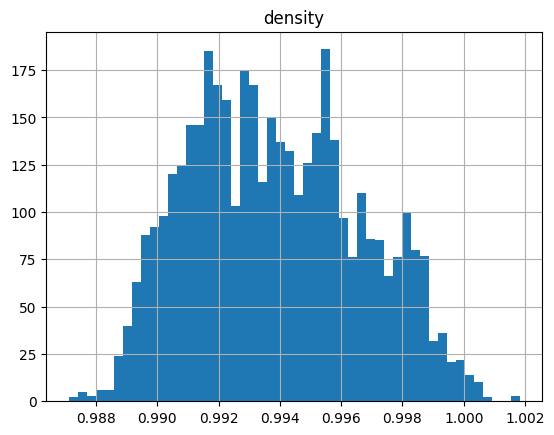

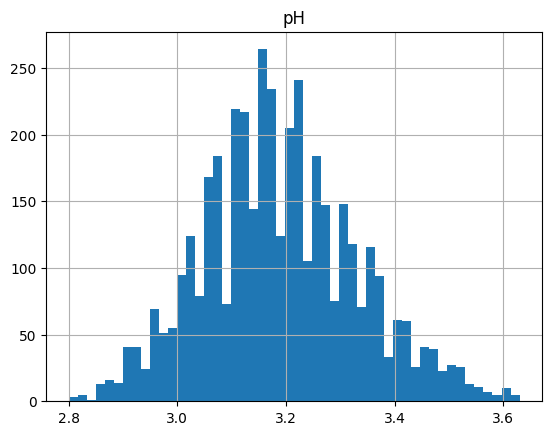

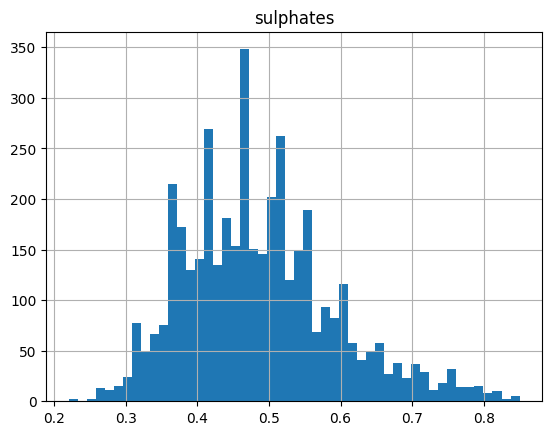

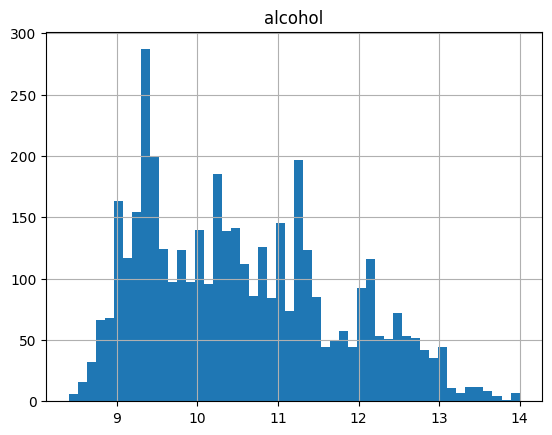

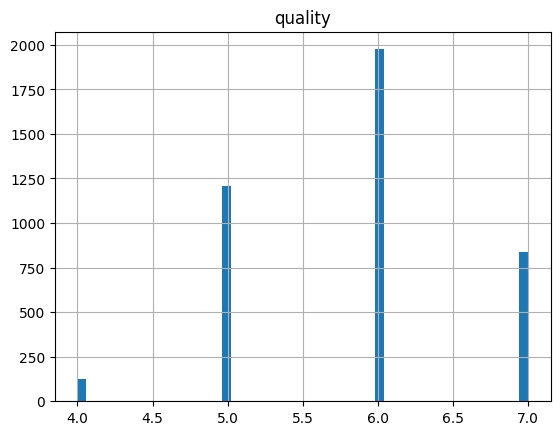

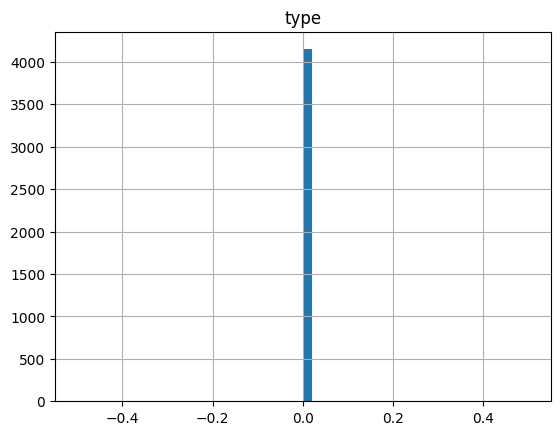

In [ ]:
for column in columns:
    data_filtered.hist(column, bins = 50)

In [ ]:
data.to_csv('../data/output.csv', index=False, encoding='utf-8')

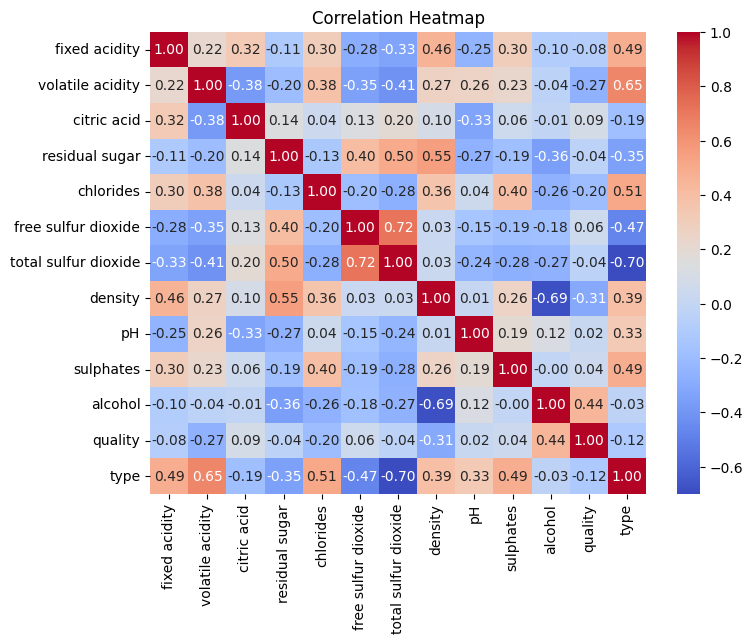

In [152]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<font size=4>
Анализируя цветовую карту, можно сделать выводы:
- `fixed acidity` имеет сильную прямую корреляцию с типом вина (0.49) и обратную корреляцию с признаками `total sulfur dioxide` (-0.38), `free sulfur dioxide` (-0.28), `pH` (-0.25). То есть фиксированная кислотность обратно коррелируется с содержанием серы и показателем pH.
- `volatile acidity` демонстрирует самую сильную положительную корреляцию с типом вина (0.65), что указывает на её важность для классификации.
- `free sulfur dioxide` и `total sulfur dioxide` имеют почти полную корреляцию (1.00), что говорит о дублировании информации — один из этих признаков можно исключить.
- `density` сильно коррелирует с `residual sugar` (0.55) и имеет обратную связь с `aluminum` (-0.69), что логично, так как сахар увеличивает плотность.
- `sulfates` отрицательно коррелируют с типом вина (-0.43), что означает их противоположное влияние на классификацию по сравнению с кислотностью.
- `chlorides` умеренно коррелирует с несколькими признаками, включая `volatile acidity` (0.38) и `free sulfur dioxide` (0.70).
- Большинство остальных корреляций слабые (<0.3), что указывает на относительную независимость этих признаков.

**Пояснение терминов:**
- `fixed acidity` — фиксированная (титрируемая) кислотность
- `volatile acidity` — летучая кислотность
- `citric acid` — лимонная кислота
- `residual sugar` — остаточный сахар
- `chlorides` — хлориды
- `free sulfur dioxide` — свободный диоксид серы
- `total sulfur dioxide` — общий диоксид серы
- `density` — плотность
- `pH` — pH (водородный показатель)
- `sulfates` — сульфаты
- `aluminum` — алюминий (вероятно, опечатка, вместо alcohol)
- `potassium` — калий
- `type` — тип вина
</font>